# Support Vector Regression (SVR)

Intuition for Linear Kernel SVR (There are many types: kernels for linear relationships & for non-linear relationships etc)

![intuition.png](images/intuition.png)

Any point in our data that falls inside the tube will be disregarded.
This tube is like a marginal error that we are allowing our model to have.
<br>
Points inside the tube won't be counted in the error

Idea behind: SVR: It gives a buffer to our model
        
Points outisde the tube: We do care about their error. The points outside the tube are dictating what the tube will look like or its position

Why is it called SVR?
<br>
Any point : Vector
<br>
Outside Tube: Support Vector (dictating the tube)

### Problem Statement:

A person has asked our company's department for a certain salary(huge) so we retrieved salary structure data of his current organization to predict what would his current salary be based on his experience

He has around <b>6.5 years</b> experience and is asking for <b>160K</b> salary based on the reasoning that he earns the same in his current company

## Importing the libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Basic Understanding of slicing

If you use a slice, you're asking for a group of thing, that group could contain 0, 1 or multiple things, but conceptually it's a group whereas if you use a number, you just asking for one thing

If you're asking for a group, it'll return a group

<b>Slice [slice:slice] returns a list/array of each element, Index[slice:int] returns a series of all elements</b>

In [27]:
lst = [1,2,3,4]

In [28]:
lst[1]

2

In [30]:
lst[1:2]

[2]

That's why dataset.iloc[:,1:-1] is different from dataset.iloc[:,-1]
First returns slice of column and second returns a list of column

NOTE: Since 2-D array as input is required in ML, use [1:-1] as it returns array of arrays

<hr style="border:1px solid gray"> </hr>

## Importing the dataset

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [23]:
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [24]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [32]:
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [34]:
#Needed for feature scaling as this the structure it expects (2-D array)
Y = Y.reshape(-1,1)
Y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

#### We are not going to split the data to train and test. The data set is very small. So we take everything as training data.

## Feature Scaling

We will apply feature scaling to both dependant(because the values are not in range from 0 to 1) and independant variable here

When do we <b>not</b> apply feature scaling:
    1. On hot encoded variables
    2. When a dependent/independent variable already has values in range of 0 to 1

In [39]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()

<b>Why should we use DIFFERENT scalers?

I guess u must have written this code(If you use the same scaler)

sc_x  = StandardScaler()

x = sc_x.fit_transform(x)

y = sc_x.fit_transform(y).



If u have written this then u will definitely get same result as fit_transform() on y will calculate mean and SD for y again and then scale y.

Instead if u have written y = sc_x.transform(y). that is not fit_transform()

only transform() then you will get definitely diff result which is so true because it will use mean and SD of X and apply it in formula on y so get definitely diff and ofcourse wrong result,

Talking about mean and SD, i will try to explain how does that work: fit method calculate mean and SD for the data we apply as a parameter in and transform method apply formula of standardization on it and transform it.

Since the values of X and Y are diff both will have diff mean and SD respectively.

So after transforming the values will be as done in tutorial, do have a check have u wrote the code  mentioned above? if yes then y = sc_x.fit_transform(y). will calculate mean and SD for y again and so your output shows same, only diff is you have made 1 object of StandardScaler class sc_y less.

<b> Also if you use same scaler for both X & y during the inverse_transform method you will get incorrect result because the algorithms would use the most recently trained model.So it can't distnigiush between X & y data. </b>

In [40]:
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)

In [41]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [42]:
Y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Train the SVR model on the whole dataset

Type of kernels(linear, non-linear, radial etc): https://data-flair.training/blogs/svm-kernel-functions/

We will use RBF (most widely used)

![gaussrbf.png](images/gauss_rbf.png)

In [43]:
from sklearn.svm import SVR #sklearn library -> svm module -> SVR class

#most widely used & recommended kernel : rbf: radial basis function
regressor = SVR(kernel = 'rbf')
regressor.fit(X, Y)

C:\Users\Akshit.Miglani\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

X was scaled by sc_x and Y was scaled by sc_y

In [48]:
#6.5 isn't scaled here to the same scale as that of X
regressor.predict([[6.5]])

array([0.01158103])

Years of Experience is our X(independent variable) and X was scaled by sc_X

In [47]:
#This scales the 6.5 to the same scale that was applied to X(Years of Experience)
sc_X.transform([[6.5]])

array([[0.34815531]])

In [62]:
#Returns value in same scale as that of scaled Y
regressor.predict(sc_X.transform([[6.5]]))

array([-0.27861589])

<b>Now we need to REVERSE SCALE BACK TO original scale of Y(as given in the excel data)

In [51]:
sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

#### We got 170K prediction here which is a really good estimate

## Visualising the SVR results

Text(0, 0.5, 'Salary')

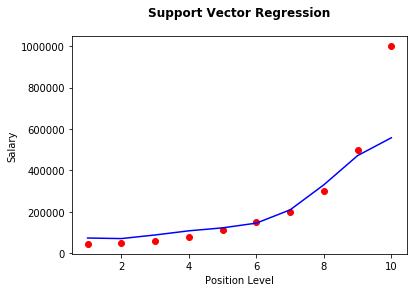

In [72]:
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color='red')
# X is already transformed/scaled. In above example: 6.5 was not scaled as according to our scale
plt.plot(sc_X.inverse_transform(X), sc_Y.inverse_transform(regressor.predict(X)), color="blue")
plt.title("Support Vector Regression",pad=20,fontsize=12, fontweight = 'bold')
plt.xlabel("Position Level")
plt.ylabel("Salary")

## Visualising the SVR results (for higher resolution and smoother curve)

Text(0, 0.5, 'Salary')

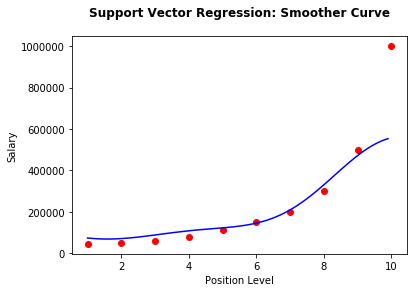

In [71]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color='red')
plt.plot(X_grid, sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color="blue")
plt.title("Support Vector Regression: Smoother Curve",pad=20,fontsize=12, fontweight = 'bold')
plt.xlabel("Position Level")
plt.ylabel("Salary")

## <font color='green'> INSIGHT: SVR doesn't do well with capturing OUTLIERS. Polynomial Regression did well to capture that, but it was mainly due to OVERFITTING </font>

Overfit vs underfit: https://www.youtube.com/watch?v=ICCA3-7a5bw